# BA875 Operations and Supply Chain Analytics (Spring 2023)
Homework Assignment 1

Name : Prateek Naharia 

nahariap@bu.edu


##Importing the dataset & Data Exploration

In [87]:
import pandas as pd
jean_url = 'https://raw.githubusercontent.com/nahariaprateek/SuppyChain_Analytics/main/datasets_course/jeans_data.csv'
#directly fetching dataset from github repository 
#https://github.com/nahariaprateek/SuppyChain_Analytics/tree/main/datasets_course
dfjeans = pd.read_csv(jean_url)
#dfjeans = pd.read_excel("jeans_data.xlsx")

In [103]:
dfjeans.tail(5)

,week,sales,price,special_event,se_indicator,discount
21,22,59,135.00,NaN,0,0.0
22,23,55,135.00,NaN,0,0.0
23,24,168,101.25,NaN,0,25.0
24,25,48,135.00,NaN,0,0.0
25,26,73,135.00,NaN,0,0.0


In [89]:
dfjeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week           26 non-null     int64  
 1   sales          26 non-null     int64  
 2   price          26 non-null     float64
 3   special_event  4 non-null      object 
 4   se_indicator   26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [90]:
dfjeans.describe()

,week,sales,price,se_indicator
count,26.000000,26.000000,26.000000,26.000000
mean,13.500000,92.115385,128.769231,0.153846
std,7.648529,65.149875,12.063151,0.367946
min,1.000000,46.000000,101.250000,0.000000
25%,7.250000,51.000000,135.000000,0.000000
50%,13.500000,62.500000,135.000000,0.000000
75%,19.750000,78.250000,135.000000,0.000000
max,26.000000,253.000000,135.000000,1.000000


From the above code, we can get an idea of all the stats, aggregation summary of the dataset.
Having Count as 26, mean, standard deviation, minimum & max values in week, sales, price & se_indicator.

<Axes: ylabel='Frequency'>

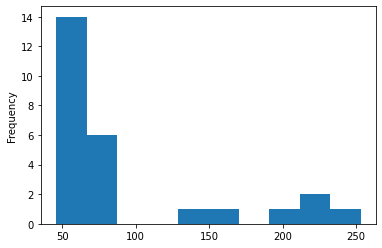

In [91]:
dfjeans["sales"].plot.hist()

In [92]:
dfjeans.price.value_counts()

135.00    20
114.75     3
101.25     3
Name: price, dtype: int64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price', ylabel='sales'>

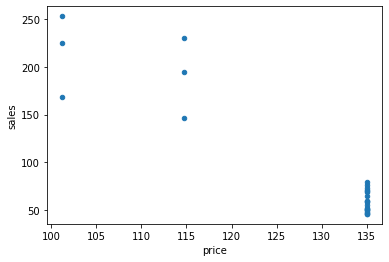

In [93]:
dfjeans.plot.scatter(x="price",y="sales")

##StatsMODELS
olsjeans = sm.OLS(y, X).fit()

###Model 1

Question/ instructions for model I

Model I: Price (in $) and special event indicator as an independent variable

• Calculate the predicted sales from promo (P) when directly including price and special event indicator as independent variables into a regression model

• Make sure to interpret your results, including the regression estimation


We are interested in giving the retailer a sense of its estimated sales if it decided tooffer a new promo to predict sales for a week in the future, i.e., they want you to predict the salesfor a future week given you offer promo (P): “$25 Off” (not 25% off) promotion specificallyduring a special event period. (Hint: after regression, apply the .predict() method).

In [104]:
# Prepare the data
import statsmodels.api as sm
X = sm.add_constant(dfjeans[['price', 'se_indicator']])#independent variables
y = dfjeans['sales'] #dependent variable or the target variable

In [106]:
# Fitting the model & printing summary
first_model = sm.OLS(y, X).fit()
print(first_model.summary())
#first_model.summary()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     295.4
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.96e-17
Time:                        16:29:39   Log-Likelihood:                -102.28
No. Observations:                  26   AIC:                             210.6
Df Residuals:                      23   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          509.0259     43.675     11.655   

OLS Regression Interpretation for the 1st Model.

1. Predicted sales as intercept appears to be 509 when the price is $0. 

2. RSquare Value is 0.963 - stating 96.3% of the variation in the sales data.

3. Coefficient of se_indicator, suggesting during special event sales can be expected to have an increase of 76 units.This positive relationship indicates that special events lead to higher sales.

4. P-Value for se_indicator & price are 0. Therefore statistically significant independent variables for sales.

All in, the model does indicates that special events lead to higher sales.

In [107]:
promo_price = 135 - 25 #$25 Off
se_indicator_promo = 1
se_indicator_promo_n = 0
prediction = first_model.predict([1, promo_price, se_indicator_promo])
prediction_n = first_model.predict([1,promo_price, se_indicator_promo_n])

In [108]:
print("sales during special event", round(prediction[0]))
print("sales during no special event", round(prediction_n[0]))

sales during special event 219
sales during no special event 143


**From the above results we can says that:-**

Predicted sales during special event is **219** considering promoprice as original price - $25 (ie. 135 - 25)

whereas

Predicted sales when there is no special event is **143**.

###Model 2

**discount (as a % discount off original price) and special event indicator as an independent variable & sales as target variable**



• Calculate the predicted sales promo (P) when directly including price and specialevent indicator as before, but this time replace price with a % discount variable, and include discount as an independent variable into a regression model

• Make sure to interpret your results, including the regression estimation

In [109]:
#Creating new column discount variable with a%
dfjeans['discount'] = ((135 - dfjeans['price']) /135) * 100
X = sm.add_constant(dfjeans[['discount', 'se_indicator']] )
#y = dfjeans['sales'] can be re used from model 1

In [110]:
dfjeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week           26 non-null     int64  
 1   sales          26 non-null     int64  
 2   price          26 non-null     float64
 3   special_event  4 non-null      object 
 4   se_indicator   26 non-null     int64  
 5   discount       26 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB


Confirming from the above info method that, discount column has been created having original price as 135.

In [111]:
second_model = sm.OLS(y, X).fit()
print(second_model.summary())
#second_model.summary()
#fitting and printing the summery of the second model

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     295.4
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.96e-17
Time:                        16:30:01   Log-Likelihood:                -102.28
No. Observations:                  26   AIC:                             210.6
Df Residuals:                      23   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           59.6477      2.917     20.447   

OLS Regression Interpretation for the** 2nd Model**.
Here, discount percentage & se_indicator are used to predict the sales.

1. R_square value appears to be same as **96.3 %**.

2. From coefficients we can say that there is an increase of **4 units** when added **discount** & increase of **76** units during **special events**. 
The model is **statistically significant** with p-values less than 0.001.

In summary, the model indicates that both discount percentage and special events are important factors in predicting sales.


In [112]:
# Make a prediction for the "$25 Off" promotion during a special event period
promo_discount = (25 / 135) * 100
prediction = second_model.predict([1, promo_discount, se_indicator_promo])
prediction_n = first_model.predict([1,promo_price, se_indicator_promo_n])

In [113]:
print("sales during special event", round(prediction[0]))
print("sales during no special event", round(prediction_n[0]))

sales during special event 219
sales during no special event 143


**Printed values are as**

Predicted sales during special event is **219** considering promoprice as original price - $25 (ie. 135 - 25)

whereas

Predicted sales when there is no special event is **143**.